<a href="https://colab.research.google.com/github/NLEHO04/streamlit-example/blob/master/comparison_pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplsoccer

In [ ]:
!pip install highlight-text

In [ ]:
import matplotlib.pyplot as plt
from highlight_text import fig_text

from mplsoccer import PyPizza, FontManager

In [ ]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

## YOUR INPUT GOES HERE

In [ ]:
# parameter and values list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
params = [
    "Non-Penalty Goals", "npxG", "npxG per Shot", "xA",
    "Open Play\nShot Creating Actions", "\nPenalty Area\nEntries",
    "Progressive Passes", "Progressive Carries", "Successful Dribbles",
    "\nTouches\nper Turnover", "pAdj\nPress Regains", "Aerials Won"
]
values = [99, 99, 87, 51, 62, 58, 45, 40, 27, 74, 77, 73]    # for  Thomas Muller
values_2 = [98, 75, 55, 62, 72, 92, 92, 79, 64, 92, 68, 31]  # for Dimitri Payet

background_color = "#222222"

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color=background_color,     # background color
    straight_line_color="#FFFFFF",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#FFFFFF",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

main_title = "<Thomas Muller> vs <Dimitri Payet>"
title_1_color = '#F50A0A'
title_2_color = '#1A78CF'
subtitle = "<Percentile Rank vs Top-Five League Forwards | Season 2020-21>"

# add credits
CREDIT_1 = "data: statsbomb via fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

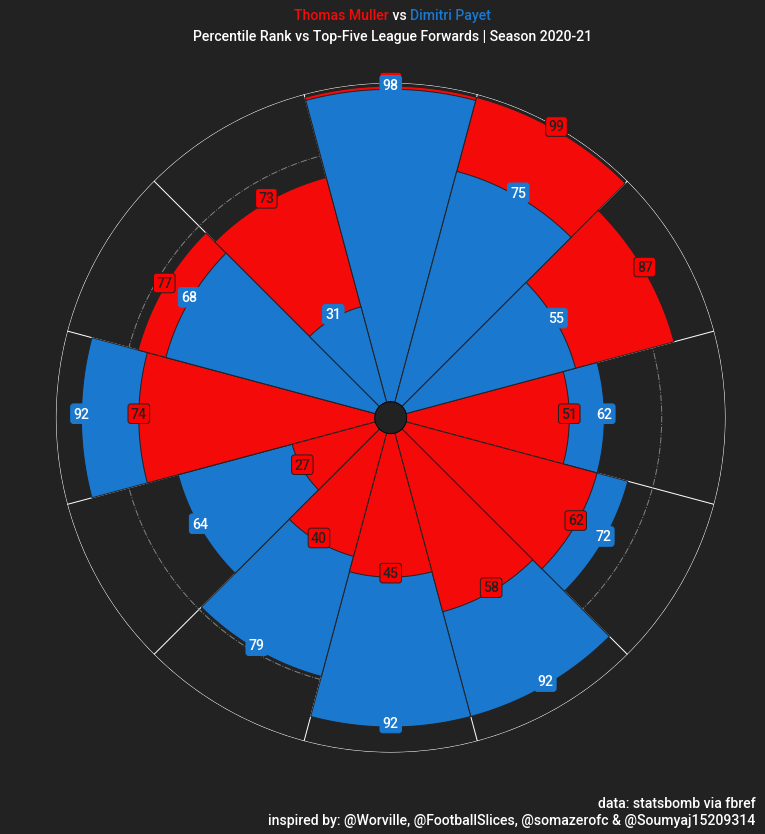

In [ ]:
# plot pizza
fig, ax = baker.make_pizza (
    values,                     # list of values
    compare_values=values_2,    # comparison values
    figsize=(12, 16),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#F50A0A", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#222222", fontsize=15,
        fontproperties=font_bold.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#222222", fontsize=15,
        fontproperties=font_bold.prop, zorder=3,
        bbox=dict(
            edgecolor="#222222", facecolor="red",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#FFFFFF", fontsize=15, fontproperties=font_bold.prop, zorder=3,
        bbox=dict(edgecolor="#1A78CF", facecolor="#1A78CF", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)


# add title
fig_text(
    0.515, 0.858, main_title, size=22, fig=fig,
    highlight_textprops=[{"color": title_1_color}, {"color": title_2_color}],
    ha="center", fontproperties=font_bold.prop, color="#FFFFFF"
)

# add subtitle
fig_text(
    0.515, 0.84,
    subtitle,
    fontsize=14, highlight_textprops=[{"color": '#FFFFFF'}], fig=fig,
    ha="center", fontproperties=font_bold.prop, color="#FFFFFF"
)

# add title - invisible (to fix the error)
fig.text(
    0.515, 0.85, main_title, size=17,
    ha="center", fontproperties=font_bold.prop, color="#222222", alpha=0
)

fig.text(
    0.935, 0.15, f"{CREDIT_1}\n{CREDIT_2}", size=15,
    fontproperties=font_bold.prop, color="#FFFFFF",
    ha="right"
)

fig.savefig("saved_plot.jpg", dpi=400, bbox_inches="tight", facecolor=background_color)

plt.show()